# Prediction of parking violations in Vancouver


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime, date, time
import datetime


In [2]:
%matplotlib inline

In [3]:
df=pd.read_csv('E:\DS18\Vancour-16.csv', parse_dates=True)
df.head()

HUNDRED_BLOCK       STREET      DATE   BYLAW      SECTION STATUS  \
0              8  Burrard St.  1/2/2016  2952.0  5(4)(a)(ii)      I   
1              8     Howe St.  1/2/2016  2952.0  5(4)(a)(ii)      V   
2              7   Smithe St.  1/2/2016  2952.0  5(4)(a)(ii)      I   
3              7   Smithe St.  1/2/2016  2952.0  5(4)(a)(ii)      I   
4              8     Howe St.  1/2/2016  2952.0  5(4)(a)(ii)      I   

        DESCRIPTION  
0  FLASHING 4 ZEROS  
1  FLASHING 4 ZEROS  
2  FLASHING 4 ZEROS  
3  FLASHING 4 ZEROS  
4  FLASHING 4 ZEROS

# Parking tickets
Data set description : 

The City of Vancouver regulates parking to balance the needs of residents, commuters, and visitors.

This data set includes parking ticket records data on a year-by-year basis beginning in 2010.

Note: Ticket issued location information was aggregated to 100-block unit level.

Attributes:

    Hundred_Block: Block level of the street where the infraction occurred. For example: 1 Main Street means 100 Main Street.
    Street: Name of the street where the infraction occurred
    Date: Date the infraction occurred in month/day/year format
    Bylaw: Specific parking bylaw which the parking ticket was issued under
    Section: Specific section of the bylaw which the infraction pertains
    Status: Status of the parking ticket
            I = Issued
            W = Warning
            V = Void
            R = Cancelled due to Paid by Phone
    Description: Short description of the infraction

website for data:  http://data.vancouver.ca/datacatalogue/parking-tickets.htm


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424808 entries, 0 to 424807
Data columns (total 7 columns):
HUNDRED_BLOCK    424808 non-null int64
STREET           424808 non-null object
DATE             424808 non-null object
BYLAW            416497 non-null float64
SECTION          424808 non-null object
STATUS           424808 non-null object
DESCRIPTION      416497 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 22.7+ MB


In [5]:
new=df.drop_duplicates()
#drop the duplicates and save as new

In [6]:
new=df.dropna(axis=1, how='all')

In [7]:
new['month'] = pd.DatetimeIndex(new['DATE']).month

In [8]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424808 entries, 0 to 424807
Data columns (total 8 columns):
HUNDRED_BLOCK    424808 non-null int64
STREET           424808 non-null object
DATE             424808 non-null object
BYLAW            416497 non-null float64
SECTION          424808 non-null object
STATUS           424808 non-null object
DESCRIPTION      416497 non-null object
month            424808 non-null int64
dtypes: float64(1), int64(2), object(5)
memory usage: 25.9+ MB


Broadway St. W., Vancouver, Canada
Homer St., Vancouver, Canada
4th Ave W., Vancouver, Canada
Robson St., Vancouver, Canada
Richards St., Vancouver, Canada
Cordova St. W., Vancouver, Canada
Hamilton St., Vancouver, Canada
8th Ave W., Vancouver, Canada
Seymour St., Vancouver, Canada
Alberni St., Vancouver, Canada


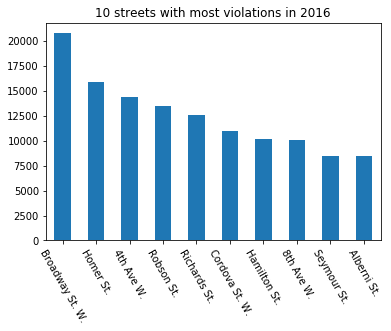

In [9]:
rank_st = new['STREET'].value_counts()
rank_st.sort_values(ascending=False)
top10 = rank_st[:10]
top10.plot(kind="bar", title="10 streets with most violations in 2016",rot=-60)
string = ', Vancouver, Canada'
top10_list = top10.index
for idx in top10_list:
    print(str(idx)+string)



In the year of 2016, we can see from above figure that there are over 20,000 violations on Broadway Street W. and there are about 8500 violations on Alberni Street. To visually identify these 10 most violations streets, the google map is utilized to show these locations in city of Vancouver in Canada.

#from IPython.core.display import Image
#Image(filename=('E:/DS18/datacamp/tenvio.jpg'))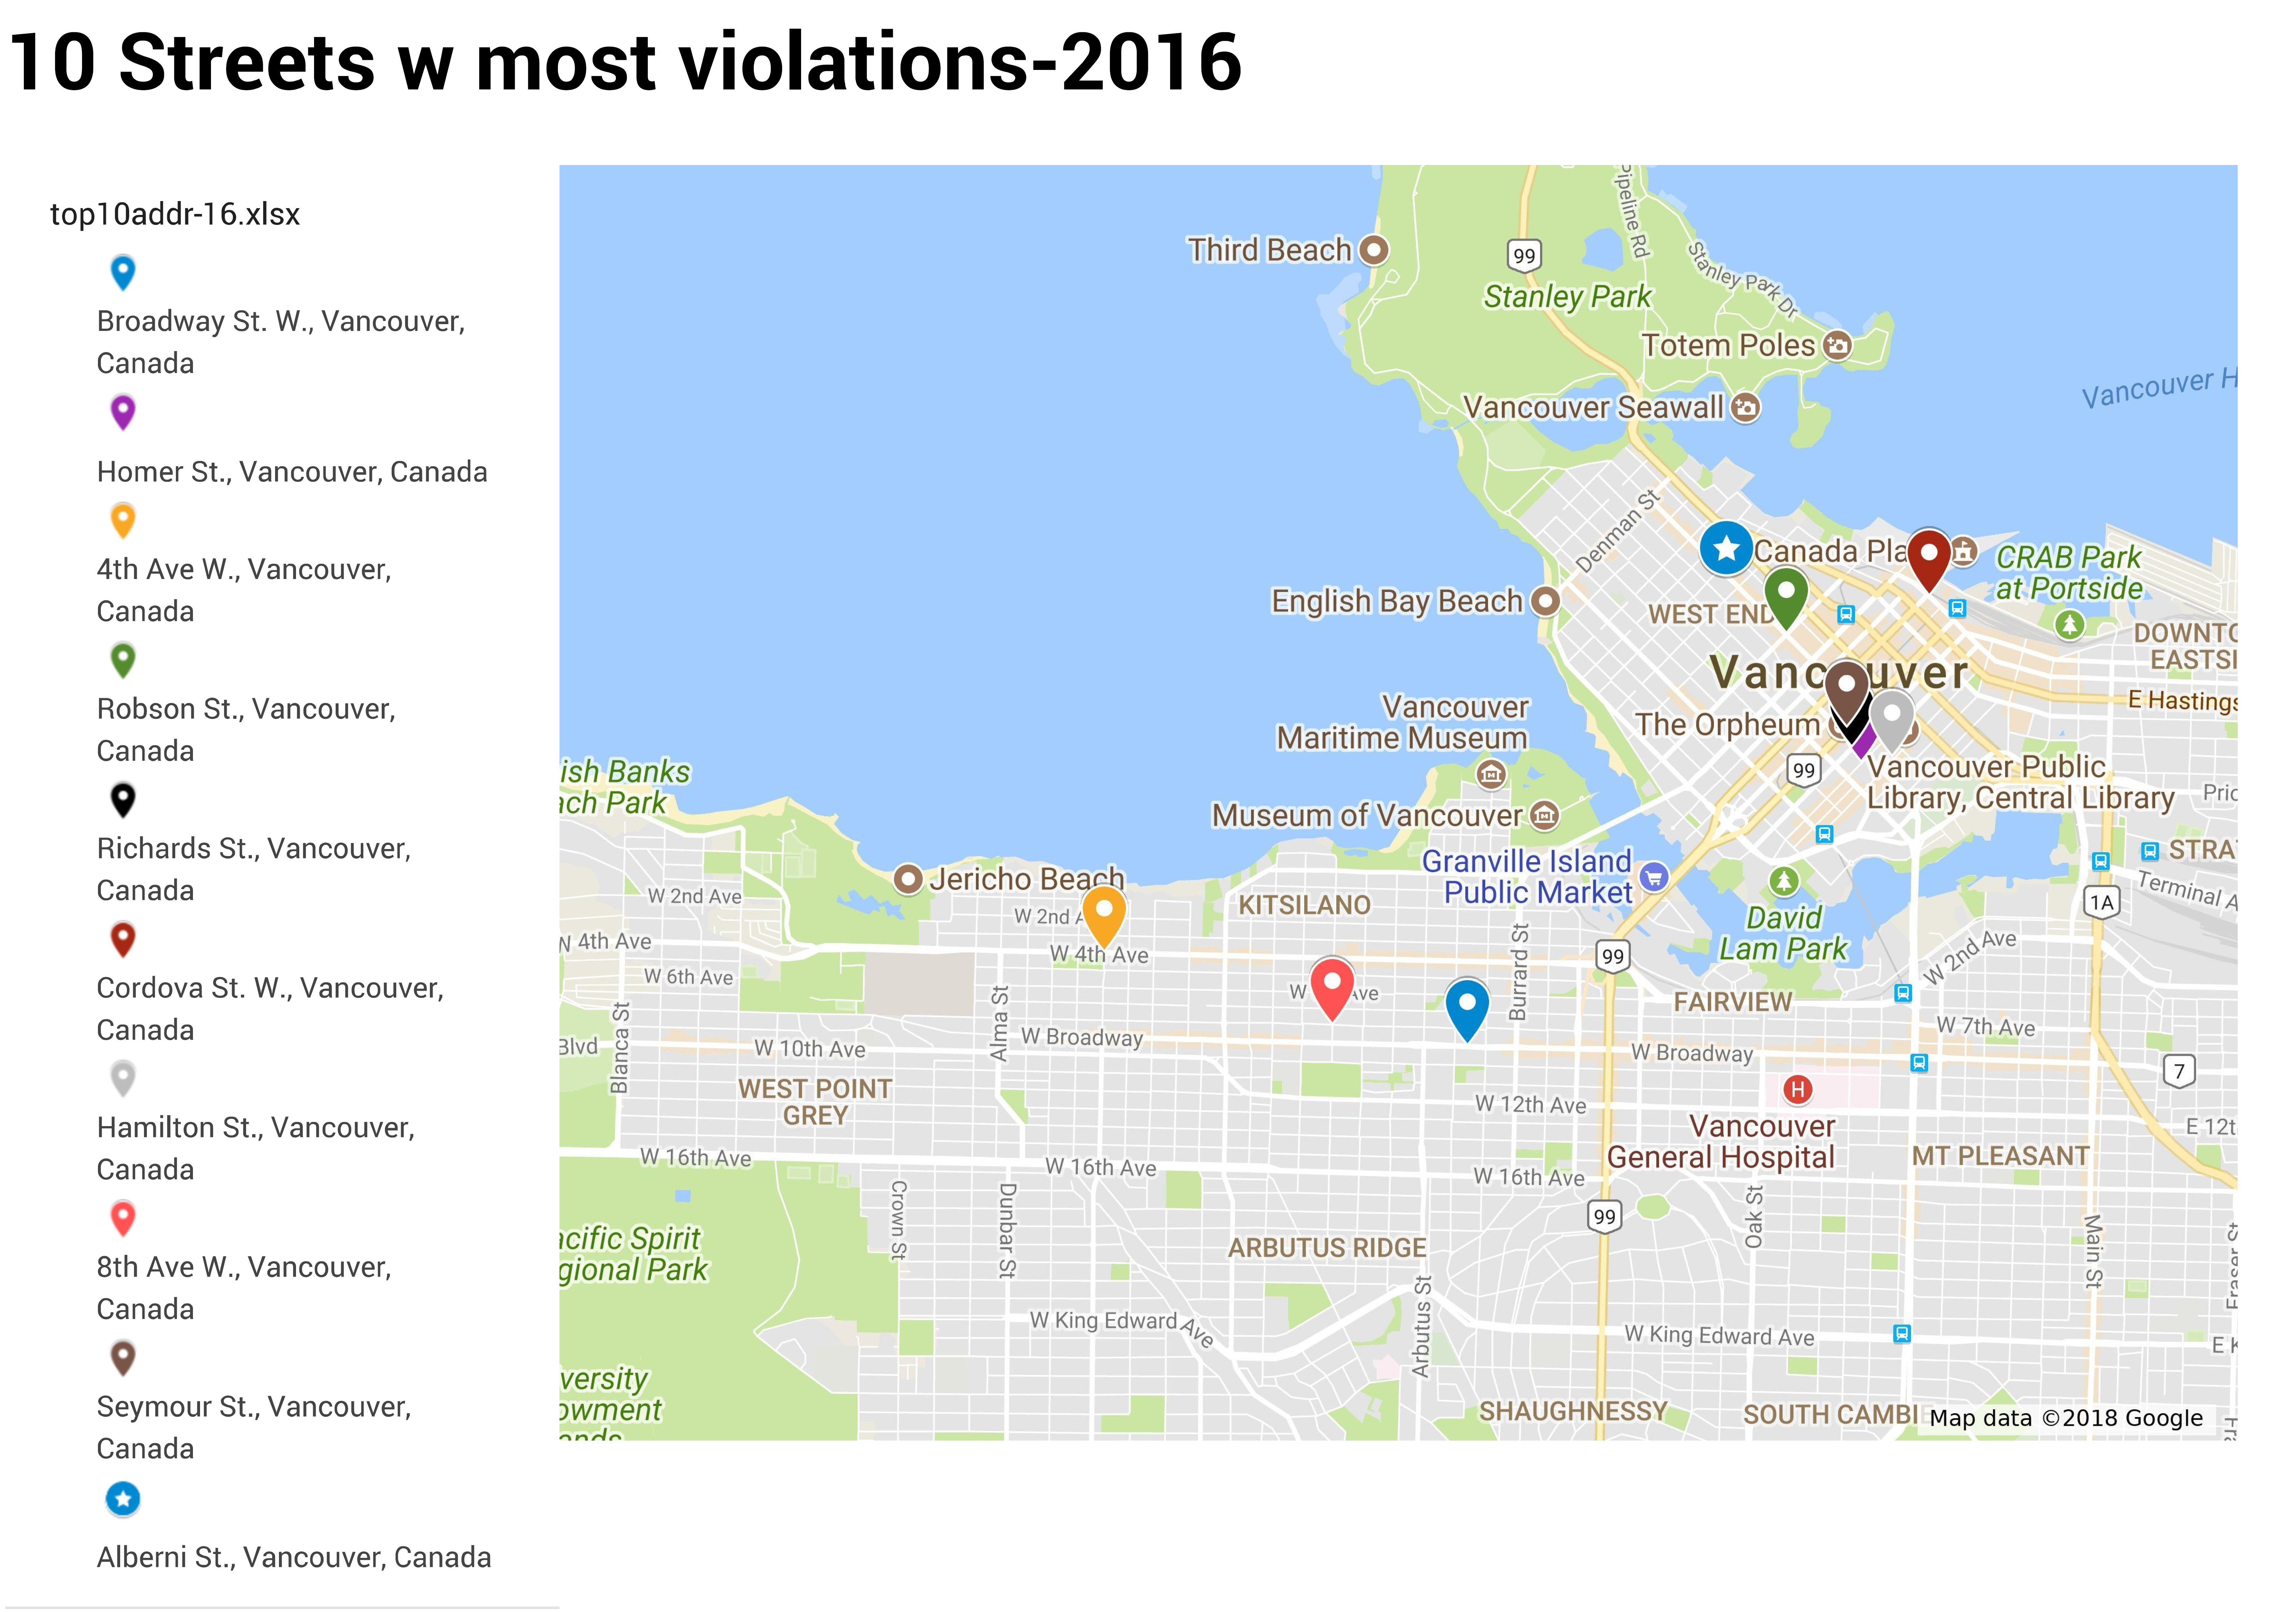

From the map shown above, the most parking tickets issued is on the Broadway Stree W. and the third is issued on 4th Ave. W, these locations are on the southwest part of the Vancouver city. The other 7 most violations occurred on the center of the city. the wikipedia describes the Broadyway Street W as in the link: 
https://en.wikipedia.org/wiki/Broadway_(Vancouver)
along the street, there are  University of British Columbia (UBC), low-rise apartment blocks and small supermarkets and  rental suites. 
Therefore it is very buzziling area and there are lots of activities in these area and thereby leads lots of traffic and parking activities. The contribution of parking violation from university will be explored as the time vs violations # at these locations. 

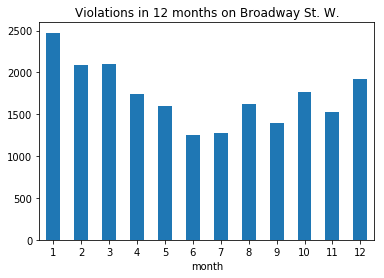

In [10]:
top1=new.loc[new['STREET']=='Broadway St. W.']
num=top1.groupby(['month'])['month'].count()
num.plot(kind="bar", title="Violations in 12 months on Broadway St. W.",rot=0)

The figure shown above is the 12 month violation information on Broadway St. W., it can be seen that during the summer months(June-September) the violations are the lowest for all year of 2016. This may be resulted from the during the summer season the UBC university is closed and therefore there are less automobiles near the street and less violations.

In [ ]:
bottom10 = rank_st[-10:]
bottom10.plot(kind="bar", title="10 streets with least violations",rot=-60)

Create the bar chart for column 'Street'

In [ ]:
top10 = new['DESCRIPTION'].value_counts()
top10.sort_values(ascending=False)
top10 = top10[:10]
top10.plot(kind="pie")

Create pie chart for column 'Street'